# "Understanding Socioeconomic Dynamics: Exploring Relative Poverty, Negative Net Wealth, and Net Wealth Trends"

The aim of this project is analysis the relative poverty and it various form of wealth (positive and negative) in Denmark: Net Wealth and Negative Net Wealth. In the following sections we will present an exploration of trends and patters in these variables to gain insights into the socioeconomic dynamics not only in group of municipalities of Denmark by also in group of ages.

Additionally, according to the 2023 Country Report, the Danish economy has experienced robust growth, only interrupted by significant fluctuations during the COVID-19. Denmark recorded a current account surplus of 13.1% of GDP in 2022, mainly because of a temporary spike in sea freight rates. 

In the context of Covid-19, the removal of restrictions has boosted employment, productivity, and investment, also Denmark has introduced a range of social benefits that target older people, students, and low-income groups, as well as health-related policies, making the relative poverty decreased, from 4.4% (2019) to 3.7% (2022).

However, even though the relative poverty reduced, Denmark presents some challenges regarding the accessibility of housing, for example. This factor, among others, can explain the reason for an increase of negative net wealth in the country due to the increase of materials mainly during Covid-19 (overall represents 41% of their income for a single person).

This project will analyse 3 variables from 2015 to 2022 in Denmark:

1. **Relative poverty**: Poverty measuared in relation to the general standard of living in society. This variable combines low income, low wealth, excluding students living away fromhome, person without income, and young people who moved from non-relative poor households to realtive poor. This variable is measured in percentage of population. 
According the statistics from Denmark, 3.7% of population were relatively poor in 2022. 
2. **Negative net wealth**: Represent the condition where liabilities (debts, loabs, mortgages) exceed assests (cash, savings, investments, property) resulting in a net deficit. This variable is measured in percentage of population. 
According the statistics from Denmark, 9.6% of population were relatively poor in 2022. 
3. **Net wealth**: This variable is the value of assets owned by an individual, household, or entity after subtracting all debts and obligations. This variable is measured in DKK.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import Maritza

# Read and clean data

First we show what we do with the first set of data, then we do the same for all the other datasets, the only difference is the age-range considered. We do this to enable us to later merge the data with the different age-range specified

In [4]:
filename = 'relative_poverty.xlsx'
rp_tot = pd.read_excel(filename, sheet_name= 'Age-total')
rp_tot

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [5]:
# Rename columns by specifying a function
# Lambda function to modify the column names
# rp_tot.columns = rp_tot.columns.map(lambda x: x + '_rp_tot' if x.isdigit() else x)
# rp_tot
rp_tot.columns = rp_tot.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_rp_tot' if x.isdigit() else x)
rp_tot

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9
...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3


In [6]:
#Here we import all the datasets on relative poverty, but considering the data for different age ranges
rp_17 = pd.read_excel(filename, sheet_name= '0-17')
rp_29 = pd.read_excel(filename, sheet_name= '18-29')
rp_39 = pd.read_excel(filename, sheet_name= '30-39')
rp_49 = pd.read_excel(filename, sheet_name= '40-49')
rp_59 = pd.read_excel(filename, sheet_name= '50-59')
rp_69 = pd.read_excel(filename, sheet_name= '60-69')
rp_79 = pd.read_excel(filename, sheet_name= '70-79')
rp_80 = pd.read_excel(filename, sheet_name= '80-onwards')

In [7]:
def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
rp_17 = rename_columns(rp_17, '_rp_17')
rp_29 = rename_columns(rp_29, '_rp_29')
rp_39 = rename_columns(rp_39, '_rp_39')
rp_49 = rename_columns(rp_49, '_rp_49')
rp_59 = rename_columns(rp_59, '_rp_59')
rp_69 = rename_columns(rp_69, '_rp_69')
rp_79 = rename_columns(rp_79, '_rp_79')
rp_80 = rename_columns(rp_80, '_rp_80')

rp_17

,location,2015_rp_17,2016_rp_17,2017_rp_17,2018_rp_17,2019_rp_17,2020_rp_17,2021_rp_17,2022_rp_17
0,All Denmark,3.8,4.6,5.6,5.4,5.3,5.0,4.7,4.2
1,Capital municipalities,3.9,4.3,5.2,5.0,5.0,4.8,4.5,4.0
2,Metropolitan municipalities,4.1,4.8,6.3,6.1,6.3,5.8,5.7,5.1
3,Provincial municipalities,3.5,4.3,5.3,5.1,4.9,4.7,4.5,3.9
4,Commuter municipalities,3.0,3.9,4.9,4.6,4.6,4.2,4.0,3.6
...,...,...,...,...,...,...,...,...,...
99,Morsø,5.7,7.5,8.1,6.5,5.9,5.1,6.5,4.7
100,Rebild,2.1,2.2,3.2,3.4,3.2,3.3,2.4,2.3
101,Thisted,4.5,5.0,6.0,6.2,5.6,5.6,4.9,3.9
102,Vesthimmerlands,5.6,6.0,6.2,6.0,5.9,5.5,4.9,4.3


In [8]:
#Here we compute the same operations but using the Net Wealth dataset instead:

filename2 = 'net_wealth.xlsx'
nw_18_over = pd.read_excel(filename2, sheet_name= '18-over')

#Renaming columns
nw_18_over.columns = nw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nw_29 = rename_columns(nw_29, '_nw_29')
nw_39 = rename_columns(nw_39, '_nw_39')
nw_49 = rename_columns(nw_49, '_nw_49')
nw_59 = rename_columns(nw_59, '_nw_59')
nw_69 = rename_columns(nw_69, '_nw_69')
nw_79 = rename_columns(nw_79, '_nw_79')
nw_80 = rename_columns(nw_80, '_nw_80')

In [9]:
#Here we compute the same operations but using the Negative Net Dataset instead:
filename3 = 'neg_net_wealth.xlsx'
nnw_18_over = pd.read_excel(filename3, sheet_name= '18-over')

#Renaming columns
nnw_18_over.columns = nnw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nnw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nnw_29 = pd.read_excel(filename3, sheet_name= '18-29')
nnw_39 = pd.read_excel(filename3, sheet_name= '30-39')
nnw_49 = pd.read_excel(filename3, sheet_name= '40-49')
nnw_59 = pd.read_excel(filename3, sheet_name= '50-59')
nnw_69 = pd.read_excel(filename3, sheet_name= '60-69')
nnw_79 = pd.read_excel(filename3, sheet_name= '70-79')
nnw_80 = pd.read_excel(filename3, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nnw_29 = rename_columns(nnw_29, '_nnw_29')
nnw_39 = rename_columns(nnw_39, '_nnw_39')
nnw_49 = rename_columns(nnw_49, '_nnw_49')
nnw_59 = rename_columns(nnw_59, '_nnw_59')
nnw_69 = rename_columns(nnw_69, '_nnw_69')
nnw_79 = rename_columns(nnw_79, '_nnw_79')
nnw_80 = rename_columns(nnw_80, '_nnw_80')

# Merge Datasets

Here we combine our datasets on relative poverty, in order to have just one with all the different age ranges specified

In [10]:
datasets = [rp_17, rp_29, rp_39, rp_49, rp_59, rp_69, rp_79, rp_80]

# Initialize the merged dataset with the first dataset
merged_rp = rp_tot

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_rp = merged_rp.merge(dataset, on='location')

# Print the merged dataset
merged_rp

,location,2015_rp_tot,2016_rp_tot,2017_rp_tot,2018_rp_tot,2019_rp_tot,2020_rp_tot,2021_rp_tot,2022_rp_tot,2015_rp_17,...,2021_rp_79,2022_rp_79,2015_rp_80,2016_rp_80,2017_rp_80,2018_rp_80,2019_rp_80,2020_rp_80,2021_rp_80,2022_rp_80
0,All Denmark,3.6,4.0,4.5,4.4,4.4,4.2,4.0,3.7,3.8,...,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.8,1.0,0.8
1,Capital municipalities,4.0,4.3,4.7,4.7,4.7,4.5,4.3,4.0,3.9,...,1.1,0.9,1.0,0.9,1.0,0.9,0.9,1.0,1.3,1.0
2,Metropolitan municipalities,4.0,4.4,5.0,5.1,5.2,5.0,5.0,4.6,4.1,...,0.8,0.6,0.9,0.8,0.9,0.7,0.9,0.8,1.2,0.9
3,Provincial municipalities,3.4,3.8,4.3,4.2,4.1,4.0,3.8,3.5,3.5,...,0.7,0.6,0.6,0.6,0.7,0.6,0.7,0.7,0.9,0.7
4,Commuter municipalities,2.7,3.2,3.7,3.5,3.5,3.3,3.1,2.9,3.0,...,0.6,0.5,0.7,0.6,0.6,0.6,0.6,0.7,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,3.6,4.4,4.5,3.9,3.8,3.5,4.0,3.1,5.7,...,1.0,0.4,0.4,0.3,0.4,0.4,0.8,0.2,0.8,0.4
100,Rebild,2.2,2.3,2.8,2.6,2.6,2.5,2.1,1.9,2.1,...,0.7,0.4,0.2,0.4,0.4,0.3,0.2,0.8,0.7,0.6
101,Thisted,3.4,3.8,4.2,4.2,4.0,4.0,3.7,3.2,4.5,...,0.7,0.7,0.4,0.4,0.5,0.5,0.5,0.7,0.9,0.6
102,Vesthimmerlands,4.0,4.2,4.3,4.4,4.1,3.9,3.7,3.3,5.6,...,0.8,0.5,0.3,0.4,0.2,0.5,0.6,1.0,0.7,0.6


In [11]:
#Mearging datasets on net wealth:
datasets = [nw_29, nw_39, nw_49, nw_59, nw_69, nw_79, nw_80]

# Initialize the merged dataset with the first dataset
merged_nw = nw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nw = merged_nw.merge(dataset, on='location')

merged_nw

,location,2014_nw_18_over,2015_nw_18_over,2016_nw_18_over,2017_nw_18_over,2018_nw_18_over,2019_nw_18_over,2020_nw_18_over,2021_nw_18_over,2022_nw_18_over,...,2022_nw_79,2014_nw_80,2015_nw_80,2016_nw_80,2017_nw_80,2018_nw_80,2019_nw_80,2020_nw_80,2021_nw_80,2022_nw_80
0,All Denmark,424030,457967,493166,531665,547467,611289,675175,752900,701429,...,1520929,648413,672649,697826,736633,766356,808149,845385,920742,940050
1,Capital municipalities,445701,490596,521797,553036,563836,614787,680900,739423,674498,...,2099157,814068,863468,911708,971776,1013982,1087798,1155454,1273427,1315086
2,Metropolitan municipalities,263825,286329,304603,322136,325931,357030,398168,442355,409333,...,1663841,639565,673838,709351,761071,811235,860951,896564,973515,998729
3,Provincial municipalities,426021,460731,499840,544270,565146,637419,703306,790697,738875,...,1471643,636139,660681,684158,720911,746390,792604,831236,899056,919090
4,Commuter municipalities,502740,538153,586441,641036,667947,752423,827744,936478,880420,...,1520070,660809,676931,705964,750415,779973,819805,857582,938813,950745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Morsø,435593,481452,508168,551551,552895,607091,665579,724721,703391,...,1140245,526975,583032,574841,608875,610089,633435,659651,718213,755686
100,Rebild,577328,588561,655969,677211,720565,776218,835553,940358,908467,...,1489972,776646,743555,780614,801784,870791,886305,877149,922561,921536
101,Thisted,450150,483470,503645,556315,556535,616586,690912,772782,726938,...,1223738,586715,616287,634118,668981,674757,718238,749098,802818,797500
102,Vesthimmerlands,440199,443381,491206,531309,534216,615582,672841,749516,723450,...,1241721,592607,581605,624418,639834,627717,673381,673327,723523,733795


In [12]:
#Merging datasets on negative net wealth
datasets = [nnw_29, nnw_39, nnw_49, nnw_59, nnw_69, nnw_79, nnw_80]

# Initialize the merged dataset with the first dataset
merged_nnw = nnw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nnw = merged_nnw.merge(dataset, on='location')


In [170]:
# For explanatory reasons:
# We now have three datasets:

# merged_rp: which contains all the data on relative-poverty divided also by age ranges
# merged_nw: which contains all the data on net wealth divided also by age ranges
# merged_nnw: which contains all the data on negative net wealth divided also by age ranges

SLICING: Cutting off extra municipalities

In [13]:
#Here we sliced the dataset for net-wealth in order to keep just the first rows, excluding all the municipalities
merged_nw_final = merged_nw.iloc[:7]
#merged_nw_final

In [14]:
#Here we just flip the dataset, to make it easier to read
nw_long = pd.melt(merged_nw_final, id_vars=['location'], var_name='year', value_name='net_wealth')
nw_long

,location,year,net_wealth
0,All Denmark,2014_nw_18_over,424030
1,Capital municipalities,2014_nw_18_over,445701
2,Metropolitan municipalities,2014_nw_18_over,263825
3,Provincial municipalities,2014_nw_18_over,426021
4,Commuter municipalities,2014_nw_18_over,502740
...,...,...,...
499,Metropolitan municipalities,2022_nw_80,998729
500,Provincial municipalities,2022_nw_80,919090
501,Commuter municipalities,2022_nw_80,950745
502,Rural municipalities,2022_nw_80,767749


In [15]:
#We do the same also for the two other datasets, the one on relative poverty and the one on negative net wealth
merged_nnw_final = merged_nnw.iloc[:7]
nnw_long = pd.melt(merged_nnw_final, id_vars=['location'], var_name='year', value_name='negative_net_wealth')
#merged_nnw_final #this is the same initial shape
#nnw_long #this is flipped

In [16]:
merged_rp_final = merged_rp.iloc[:7]
rp_long = pd.melt(merged_rp_final, id_vars=['location'], var_name='year', value_name='relative_poverty')
#merged_rp_final #this is the same initial shape
#rp_long #this is flipped

# Analysis

In [194]:
#rp_tot

In [17]:
rp_tot_long = pd.melt(rp_tot, id_vars=['location'], var_name='year', value_name='relative_poverty')
#rp_tot_long


In [18]:
# Filter the DataFrame for 'All Denmark'
rp_all_dk = rp_tot_long[rp_tot_long['location'] == 'All Denmark']

# Plot the relative poverty data for 'All Denmark'
#rp_all_dk.plot(x='year', y='relative_poverty', legend=False);

In [198]:
#merged_rp

In [19]:
merged_rp_long = pd.melt(merged_rp, id_vars=['location'], var_name='year', value_name='relative_poverty')
#merged_rp_long

3.1 Relation between relative poverty and negative net wealth by groups of municipalities in 2019 and 2022

This section compared the variation of the relative poverty and the debt accumulation mainly comparing the year before and after COVID-19.

In [20]:
#Separeting the data bases and show 2019 and 2022 (negative net wealth)
nnw_long
nnw_long_2019_2022 = nnw_long.iloc[[35, 36, 37, 38, 39, 40, 41, 56, 57, 58, 59, 60, 61, 62]]

#Droping the unnecesary variable for the analysis
#nnw_long_2019_2022 = nnw_long_2019_2022.drop('age_group', axis=1)

df=nnw_long_2019_2022
df.loc[df['year'] == '2019_nnw_18_over', 'year'] = '2019'
df.loc[df['year'] == '2022_nnw_18_over', 'year'] = '2022'
df.to_csv('nnw_yrs.csv', index=False)
nnw= pd.read_csv('nnw_yrs.csv')
#print(nnw)

#Separeting the data bases and show 2019 and 2022 (relative poverty)
rp_long
rp_long_2019_2022 = rp_long.iloc[[28, 29, 30, 31, 32, 33, 34, 49, 50, 51, 52, 53, 54, 55]]

#Droping the unnecesary variable for the analysis
#rp_long_2019_2022 = rp_long_2019_2022.drop('age_group', axis=1)
df=rp_long_2019_2022
df.loc[df['year'] == '2019_rp_tot', 'year'] = '2019'
df.loc[df['year'] == '2022_rp_tot', 'year'] = '2022'
df.to_csv('rp_yrs.csv', index=False)
rp= pd.read_csv('rp_yrs.csv')
#print(rp)

In [33]:
# Merging the relative poverty and negative net wealth data base
merged_rp_nnw = pd.merge(rp, nnw, on=['location', 'year'])
merged_rp_nnw.to_csv('rp_nnw_yrs.csv', index=False)
#print(merged_rp_nnw)

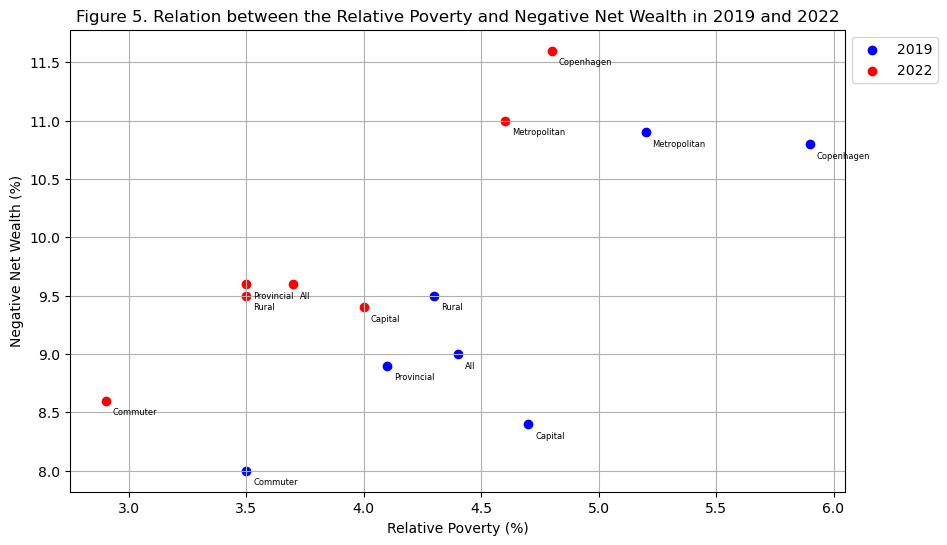

In [27]:
#Plotting the relative poverty and negative net wealth for 2019 and 2022

rp_nnw = merged_rp_nnw
rp_nnw_2019 = merged_rp_nnw[merged_rp_nnw['year'] == 2019]
rp_nnw_2022 = merged_rp_nnw[merged_rp_nnw['year'] == 2022]

# Extracting variables for 2019
location_2019 = rp_nnw_2019['location']
relative_poverty_2019 = rp_nnw_2019['relative_poverty']
negative_net_wealth_2019 = rp_nnw_2019['negative_net_wealth']

# Extracting variables for 2022
location_2022 = rp_nnw_2022['location']
relative_poverty_2022 = rp_nnw_2022['relative_poverty']
negative_net_wealth_2022 = rp_nnw_2022['negative_net_wealth']

# Plotting scatter plot for 2019 (blue color)
plt.figure(figsize=(10, 6))
plt.scatter(relative_poverty_2019, negative_net_wealth_2019, color='blue', label='2019')

# Plotting scatter plot for 2022 (red color)
plt.scatter(relative_poverty_2022, negative_net_wealth_2022, color='red', label='2022')

for i, txt in enumerate(location_2019):
    plt.annotate(txt.split()[0], (relative_poverty_2019.iloc[i], negative_net_wealth_2019.iloc[i]), fontsize=6, xytext=(5,-10), textcoords='offset points')

# Annotating each point with the corresponding location for 2022
for i, txt in enumerate(location_2022):
    plt.annotate(txt.split()[0], (relative_poverty_2022.iloc[i], negative_net_wealth_2022.iloc[i]), fontsize=6, xytext=(5,-10), textcoords='offset points')

plt.grid(True)
plt.title('Figure 5. Relation between the Relative Poverty and Negative Net Wealth in 2019 and 2022')
plt.xlabel('Relative Poverty (%)')
plt.ylabel('Negative Net Wealth (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Figure 5 shows that although relative poverty reduced in 2022 before COVID-19 compared to 2019 (previous COVID-19), the negative net wealth increased in all group municipalities and the country: Relative poverty from 4.4% to 3.7% and the accumulation of debt from 9.0% to 9.6% in 2019 and 2022, respectively.

The changes could be explained because Denmark experienced an economic recovery in 2022 because of the increase in consumer spending, investment, effective social welfare programs, and reduced poverty levels even in the face of economic challenges. However, debt accumulation increased mainly in younger generations (see Figure X) because of different factors: rising mortgage debt in housing, difficulties in accessing a job, and increasing cost of living. An example of this is Copenhagen municipality which experienced an increase of negative net wealth in comparison to other municipalities (from 10.8% in 2019 to 11.6% in 2022).

In [32]:
#Separeting the data bases and show 2019 and 2022 (net wealth)
nw_long
nw_long_2019_2022 = nw_long.iloc[[35, 36, 37, 38, 39, 40, 41, 56, 57, 58, 59, 60, 61, 62]]

#Droping the unnecesary variable for the analysis
#nnw_long_2019_2022 = nnw_long_2019_2022.drop('age_group', axis=1)

df=nw_long_2019_2022
df.loc[df['year'] == '2019_nw_18_over', 'year'] = '2019'
df.loc[df['year'] == '2022_nw_18_over', 'year'] = '2022'
df.to_csv('nw_yrs.csv', index=False)
nw= pd.read_csv('nw_yrs.csv')
#print(nw)

#SUsing the realtive poverty data bases (2019 to 2022)
rp= pd.read_csv('rp_yrs.csv')
#print(rp)

In [31]:
# Merging the relative poverty and net wealth
merged_rp_nw = pd.merge(rp, nw, on=['location', 'year'])
merged_rp_nw.to_csv('rp_nw_yrs.csv', index=False)
#print(merged_rp_nw)

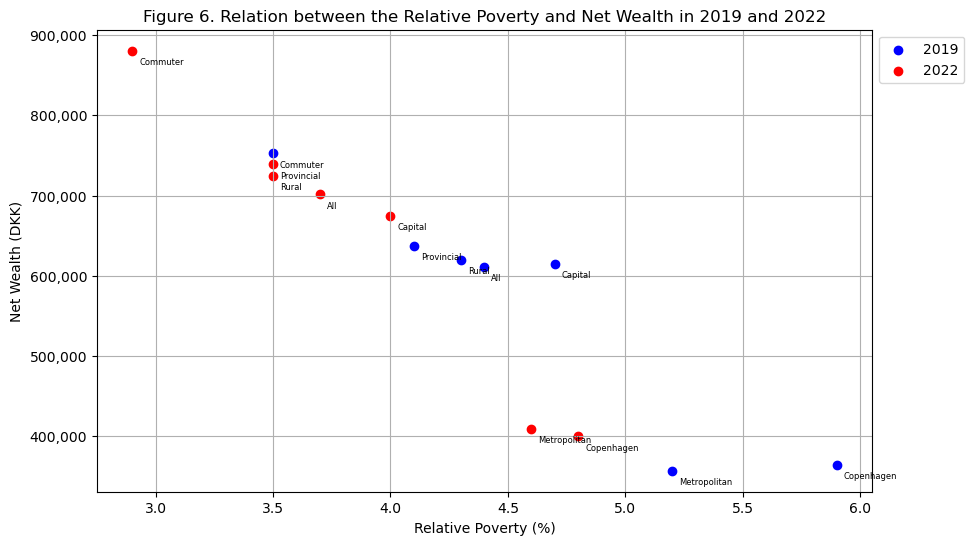

In [30]:
#Plotting the relative poverty and negative net wealth for 2019 and 2022
import matplotlib.ticker as ticker
rp_nw = merged_rp_nw
rp_nw_2019 = merged_rp_nw[merged_rp_nw['year'] == 2019]
rp_nw_2022 = merged_rp_nw[merged_rp_nw['year'] == 2022]

# Extracting variables for 2019
location_2019 = rp_nw_2019['location']
relative_poverty_2019 = rp_nw_2019['relative_poverty']
net_wealth_2019 = rp_nw_2019['net_wealth']

# Extracting variables for 2022
location_2022 = rp_nw_2022['location']
relative_poverty_2022 = rp_nw_2022['relative_poverty']
net_wealth_2022 = rp_nw_2022['net_wealth']

# Plotting scatter plot for 2019 (blue color)
plt.figure(figsize=(10,6))
plt.scatter(relative_poverty_2019, net_wealth_2019, color='blue', label='2019')

# Plotting scatter plot for 2022 (red color)
plt.scatter(relative_poverty_2022, net_wealth_2022, color='red', label='2022')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Annotating each point with the corresponding location for 2022
for i, txt in enumerate(location_2019):
    plt.annotate(txt.split()[0], (relative_poverty_2019.iloc[i], net_wealth_2019.iloc[i]), fontsize=6, xytext=(5,-10), textcoords='offset points')
for i, txt in enumerate(location_2022):
    plt.annotate(txt.split()[0], (relative_poverty_2022.iloc[i], net_wealth_2022.iloc[i]), fontsize=6, xytext=(5,-10), textcoords='offset points')

plt.grid(True)
plt.title('Figure 6. Relation between the Relative Poverty and Net Wealth in 2019 and 2022')
plt.xlabel('Relative Poverty (%)')
plt.ylabel('Net Wealth (DKK)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Conclusion